# Exploratory data analysis and preprocessing
- we did not have to carry out the exploratory data analysis since the dataset is already in a form read to be fed to the Graph Neural Network for the classification task - which constitutes the goal of our experiment
- therefore we have only conducted exploratory data analysis

## imports

In [29]:
!pip install torch --quiet

In [30]:

!pip install torch_geometric --quiet

In [3]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
import torch_geometric.transforms as T

dataset = Planetoid(root='data/Planetoid', name='CiteSeer', transform=T.NormalizeFeatures())
data = dataset[0]


Processing...
Done!


## data shape overview

In [4]:
print(data)

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])


## The essentail dataset statistics
Here we explore the most basic, essential dataset statistics such as:
Number of Nodes, Number of edges, etc..

In [5]:
print(f"Dataset: {dataset.name}")
print('-----------------------------')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of features per node: {dataset.num_node_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Training nodes: {data.train_mask.sum()}')
print(f'Validation nodes: {data.val_mask.sum()}')
print(f'Test nodes: {data.test_mask.sum()}')

Dataset: CiteSeer
-----------------------------
Number of nodes: 3327
Number of edges: 9104
Number of features per node: 3703
Number of classes: 6
Training nodes: 120
Validation nodes: 500
Test nodes: 1000


# Data distribution plots
- we explore the distributions of the class / splits in the dataset

## dataset class distribution
The distribution of the labels per class
- we can see there are differences in the distribution

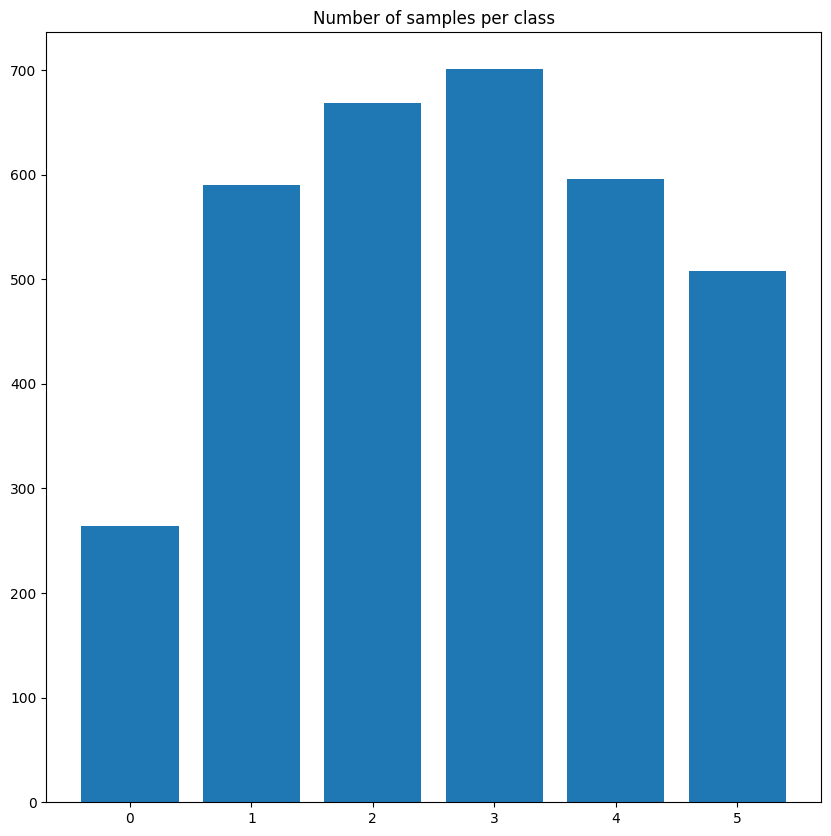

In [25]:
import matplotlib.pyplot as plt
import torch

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.bar(range(dataset.num_classes), torch.bincount(data.y))
ax.set_xticks(range(dataset.num_classes))
ax.set_title('Number of samples per class')
fig.show()

## dataset splits distribution

Here we see the distribution of the dataset splits,
the training set is by far the smallest of all the splits - what makes our task - learning the classification - interesting

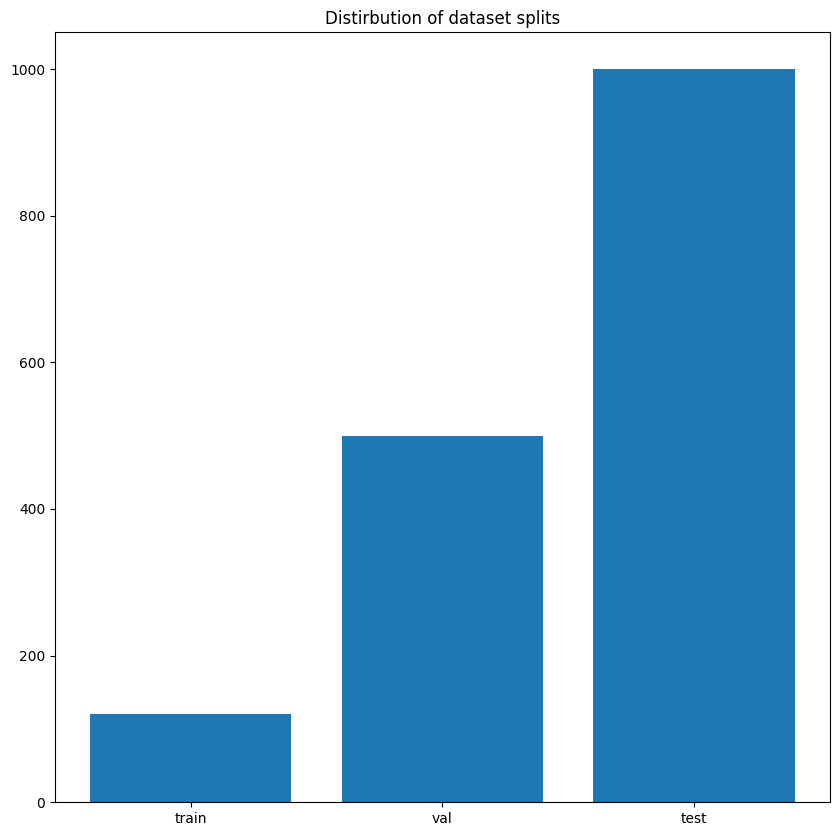

In [32]:

import matplotlib.pyplot as plt
import torch

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.bar(range(3), [data.train_mask.sum(),data.val_mask.sum(),data.test_mask.sum()])
ax.set_xticks(range(3))
ax.set_xticklabels(["train","val","test"])
ax.set_title('Distirbution of dataset splits')
fig.show()

## Class distirbution within each split

we see the distribution of the labels within each split -  we see that for each split the distribution is very comparable - whihc is a promising sign

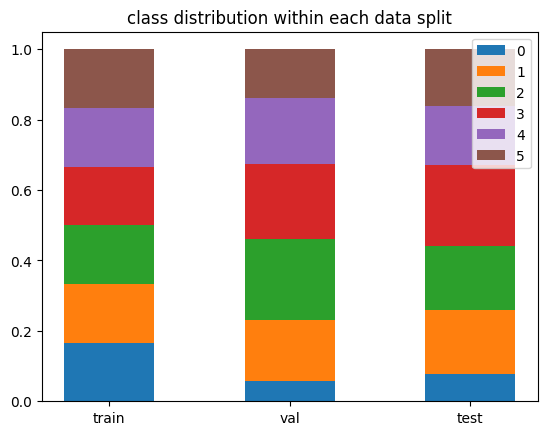

In [33]:
import numpy as np
splits= (
    "train",
    "val",
    "test"
)

train_dist = torch.bincount(data.y[data.train_mask]) /torch.sum(data.train_mask)
val_dist = torch.bincount(data.y[data.val_mask]) / torch.sum(data.val_mask)
test_dist = torch.bincount(data.y[data.test_mask]) / torch.sum(data.test_mask)
vals_stacked = np.stack([train_dist, val_dist, test_dist],axis=1)
weight_counts = {
    f"{i}" : vals_stacked[i] for i in range(dataset.num_classes)
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(splits, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("class distribution within each data split")
ax.legend(loc="best")

plt.show()

# Plots provided by the authors
- the dataset that we have decided to use(CiteSeer) has been quite comprehensively described and experimented on in the literature, therefore we could additionaly rely in our analysis on the plots that we have found in the internet

# Data statistics

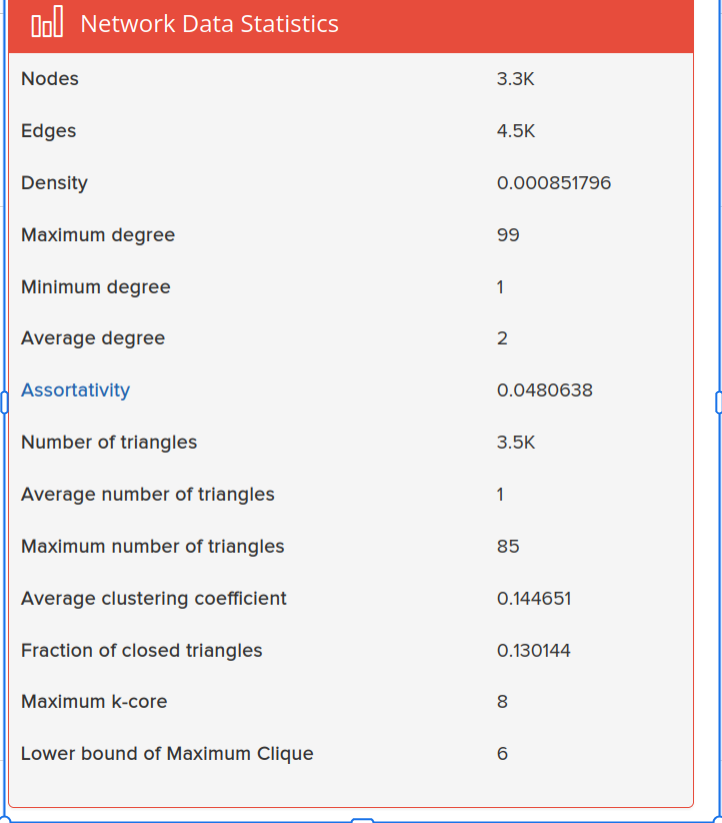

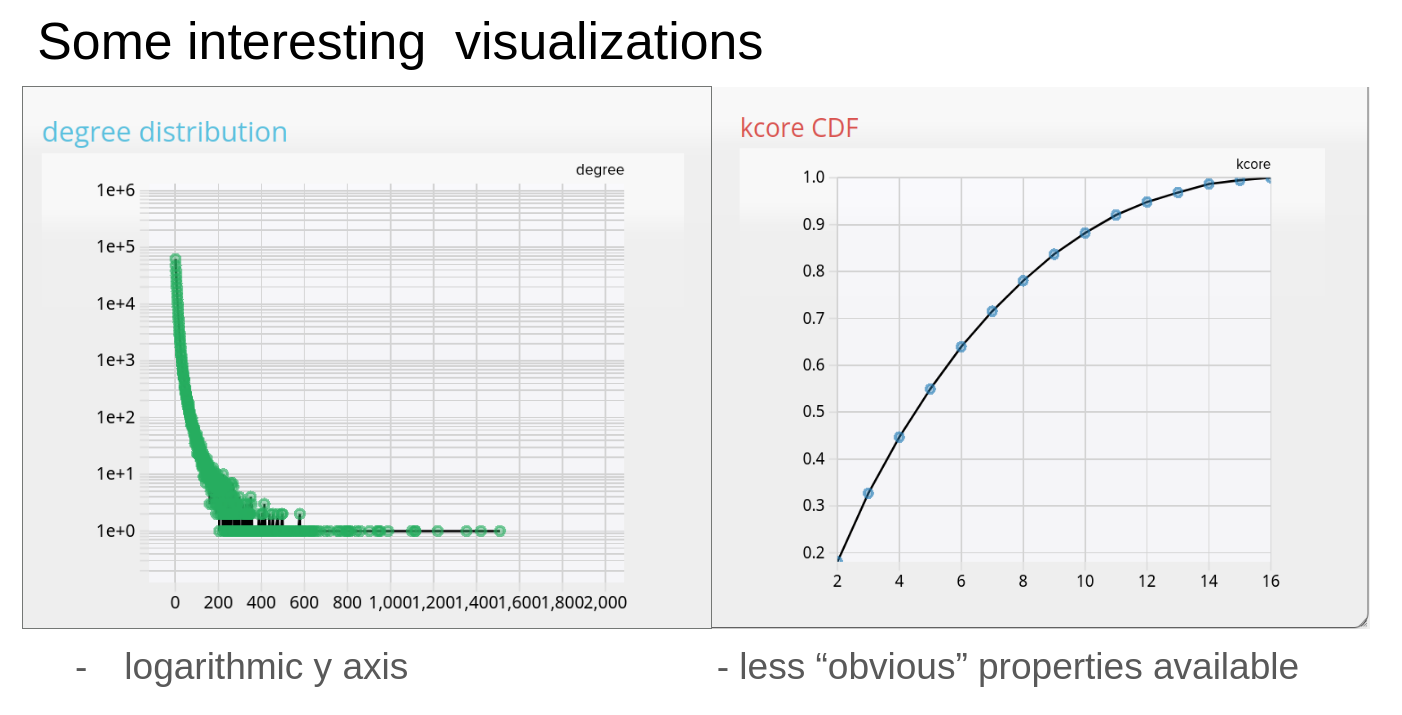

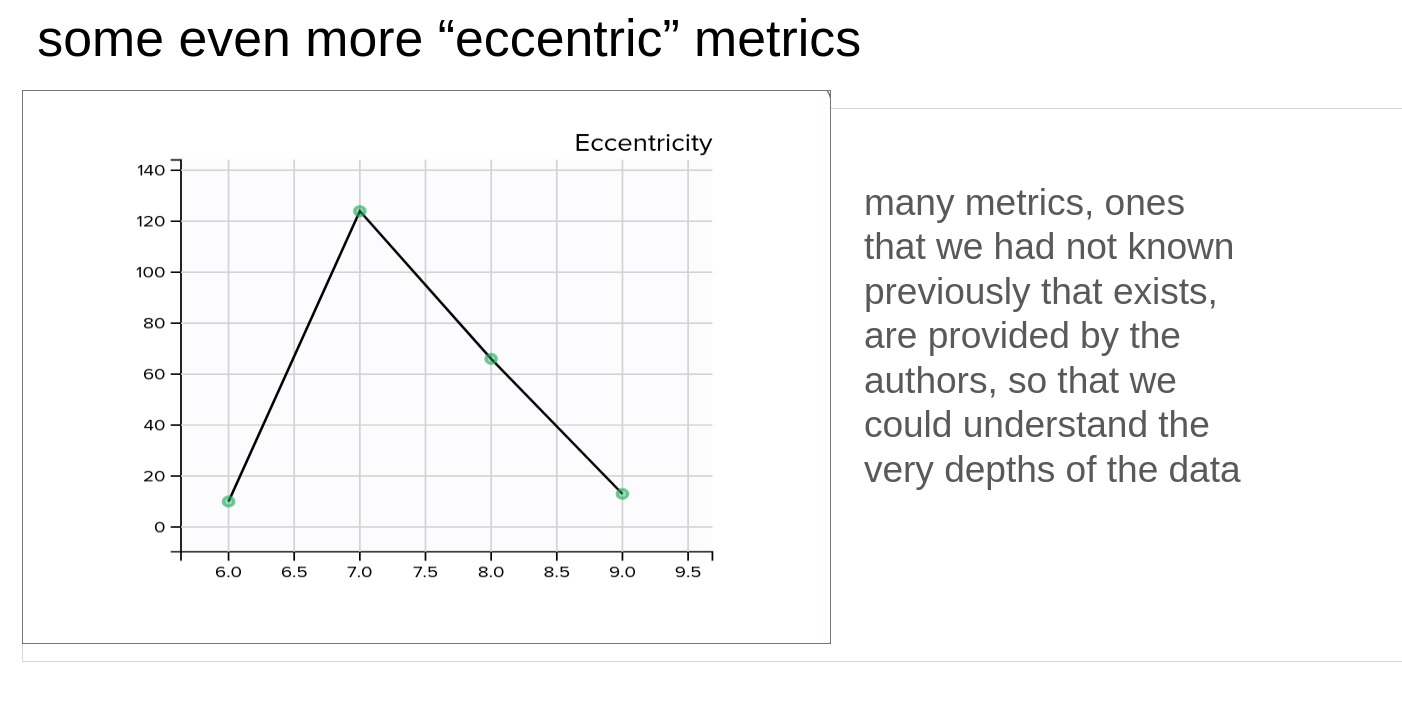

# Usefull tool demo
- Additionaly, virtually any property of the network could be further explored with a toll that enables navigation within the  graph network created.

[link text](https://drive.google.com/file/d/1wxXRsC4Wnkm-y4oO7VbzUvbHzM9jC023/view?usp=sharing)